In [1430]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1431]:
# Load your dataset
data = pd.read_csv(r"D:\ml_project\datasets\dataset_disaster.csv")
data.head()

,Disaster Date,Disaster Type,Disaster Frequency,Risk level,Disaster Location,Temperature (C),Precipitation (mm),Wind Speed (km/h),Humidity (%),Climate Zone,Recommended Material,Material Cost (per sqft),Material Durability,Soil Type,Structural Features,Foundation Type,Income Level (annual)
0,01-04-2000,Cyclone,1.0,High,West Bengal,25.0,150.0,120.0,85.0,Tropical Wet,Bamboo,1200.0,High,Clayey,Reinforced Concrete,Raised,"43,000"
1,12-07-2000,Flood,6.0,High,Assam,28.0,500.0,15.0,80.0,Subtropical,Stone,1050.0,High,Alluvial,Stone walls,Slab,"37,000"
2,15-08-2000,Flood,4.0,High,Kerala,24.0,300.0,15.0,85.0,Tropical Wet,Brick,1108.0,High,Sandy,Concrete Slabs,Raised,"50,000"
3,04-12-2000,Earthquake,3.0,High,Uttarakhand,10.0,70.0,10.0,40.0,Mountain,Stone,1222.0,Medium,Rocky,Stone walls,Deep,"40,000"
4,26-01-2000,Earthquake,2.0,High,Gujarat,20.0,40.0,10.0,30.0,Arid,Stone,860.0,High,Sandy,Reinforced Concrete,Deep,"50,000"


In [1432]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Disaster Date              210 non-null    object 
 1   Disaster Type              210 non-null    object 
 2   Disaster Frequency         210 non-null    float64
 3   Risk level                 210 non-null    object 
 4   Disaster Location          210 non-null    object 
 5   Temperature (C)            210 non-null    float64
 6   Precipitation (mm)         210 non-null    float64
 7   Wind Speed (km/h)          210 non-null    float64
 8   Humidity (%)               210 non-null    float64
 9   Climate Zone               210 non-null    object 
 10  Recommended Material       210 non-null    object 
 11  Material Cost (per sqft)   210 non-null    float64
 12  Material Durability        210 non-null    object 
 13  Soil Type                  210 non-null    object 

In [1433]:
data.describe()

,Disaster Frequency,Temperature (C),Precipitation (mm),Wind Speed (km/h),Humidity (%),Material Cost (per sqft)
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,4.423810,22.433333,194.646742,45.033333,66.066667,1126.409524
std,2.685493,7.683813,170.430145,48.796167,22.945438,186.762198
min,1.000000,3.000000,9.667000,5.000000,10.000000,300.000000
25%,2.000000,16.250000,40.133000,13.000000,45.000000,1000.000000
50%,3.000000,25.000000,150.432000,18.500000,80.000000,1150.000000
75%,7.000000,28.000000,325.606000,85.250000,85.000000,1200.000000
max,10.000000,37.000000,650.643000,215.000000,90.000000,1997.000000


In [1434]:
data.shape

(212, 17)

# Data Cleaning and Preprocessing

In [1436]:
#1.1 Identify Missing Values
print(data.isnull().sum())  # Summarizes NaN values in each column
print(data[data.isnull().any(axis=1)])  # Displays rows with NaN values


Disaster Date                2
Disaster Type                2
Disaster Frequency           2
Risk level                   2
Disaster Location            2
Temperature (C)              2
Precipitation (mm)           2
Wind Speed (km/h)            2
Humidity (%)                 2
Climate Zone                 2
Recommended Material         2
Material Cost (per sqft)     2
Material Durability          2
Soil Type                    2
Structural Features          2
Foundation Type              2
Income Level (annual)        2
dtype: int64
    Disaster Date Disaster Type  Disaster Frequency Risk level  \
210           NaN           NaN                 NaN        NaN   
211           NaN           NaN                 NaN        NaN   

    Disaster Location  Temperature (C)  Precipitation (mm)  Wind Speed (km/h)  \
210               NaN              NaN                 NaN                NaN   
211               NaN              NaN                 NaN                NaN   

     Humidity (%)

In [1437]:
#Drop rows with missing values (if few missing)
data.dropna(inplace=True)

In [1438]:
#Remove Duplicates
data.drop_duplicates(inplace=True)

In [1439]:
# 1.2 Convert date formats
data['Disaster Date'] = pd.to_datetime(data['Disaster Date'], dayfirst=True)
data.head()

,Disaster Date,Disaster Type,Disaster Frequency,Risk level,Disaster Location,Temperature (C),Precipitation (mm),Wind Speed (km/h),Humidity (%),Climate Zone,Recommended Material,Material Cost (per sqft),Material Durability,Soil Type,Structural Features,Foundation Type,Income Level (annual)
0,2000-04-01,Cyclone,1.0,High,West Bengal,25.0,150.0,120.0,85.0,Tropical Wet,Bamboo,1200.0,High,Clayey,Reinforced Concrete,Raised,"43,000"
1,2000-07-12,Flood,6.0,High,Assam,28.0,500.0,15.0,80.0,Subtropical,Stone,1050.0,High,Alluvial,Stone walls,Slab,"37,000"
2,2000-08-15,Flood,4.0,High,Kerala,24.0,300.0,15.0,85.0,Tropical Wet,Brick,1108.0,High,Sandy,Concrete Slabs,Raised,"50,000"
3,2000-12-04,Earthquake,3.0,High,Uttarakhand,10.0,70.0,10.0,40.0,Mountain,Stone,1222.0,Medium,Rocky,Stone walls,Deep,"40,000"
4,2000-01-26,Earthquake,2.0,High,Gujarat,20.0,40.0,10.0,30.0,Arid,Stone,860.0,High,Sandy,Reinforced Concrete,Deep,"50,000"


In [1440]:
# Remove commas and convert to numeric values
data['Income Level (annual)'] = data['Income Level (annual)'].replace({',': ''}, regex=True)
data['Income Level (annual)'] = pd.to_numeric(data['Income Level (annual)'], errors='coerce')

In [1441]:
# 1.3 Standardize numerical columns (e.g., "Income Level (annual)")
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()             
data['Income Level (annual)'] = scaler.fit_transform(data[['Income Level (annual)']])


# EDA

In [1443]:
import matplotlib.pyplot as plt
import seaborn as sns

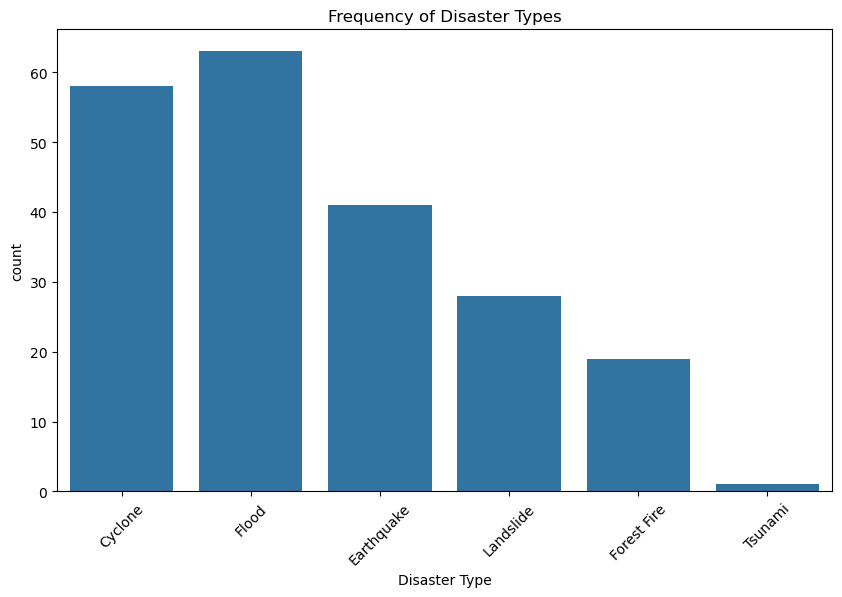

In [1444]:
# 2.1 Analyze the frequency of disaster types
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Disaster Type')
plt.title('Frequency of Disaster Types')
plt.xticks(rotation=45)
plt.show()

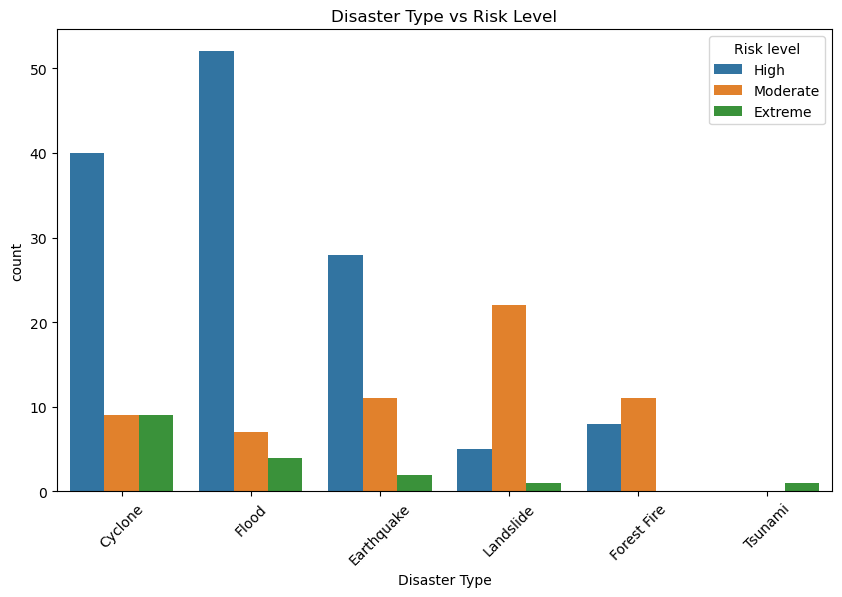

In [1445]:
# 2.2 Study the relationships between disaster type, risk level, and material recommendations
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Disaster Type', hue='Risk level')
plt.title('Disaster Type vs Risk Level')
plt.xticks(rotation=45)
plt.show()

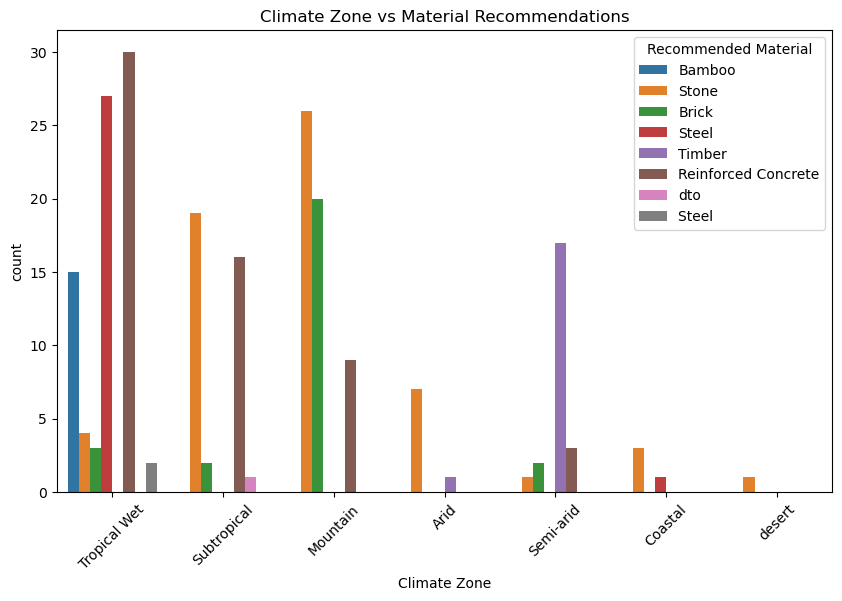

In [1446]:
# 2.3 Visualize climate zone distributions and their corresponding materials
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Climate Zone', hue='Recommended Material')
plt.title('Climate Zone vs Material Recommendations')
plt.xticks(rotation=45)
plt.show()

In [1447]:
# Trim column names to remove extra spaces
data.columns = data.columns.str.strip()

In [1448]:
# Convert "Material Cost (per sqft)" to numeric
data["Material Cost (per sqft)"] = pd.to_numeric(data["Material Cost (per sqft)"], errors="coerce")

In [1449]:
# Group by Material and calculate average cost and most common durability
cost_durability_data = data.groupby("Recommended Material").agg(
    Avg_Cost=("Material Cost (per sqft)", "mean"),
    Durability=("Material Durability", lambda x: x.mode()[0])  # Most frequent durability rating
).reset_index()


In [1450]:
# Sorting by average cost for better visualization
cost_durability_data = cost_durability_data.sort_values(by="Avg_Cost")

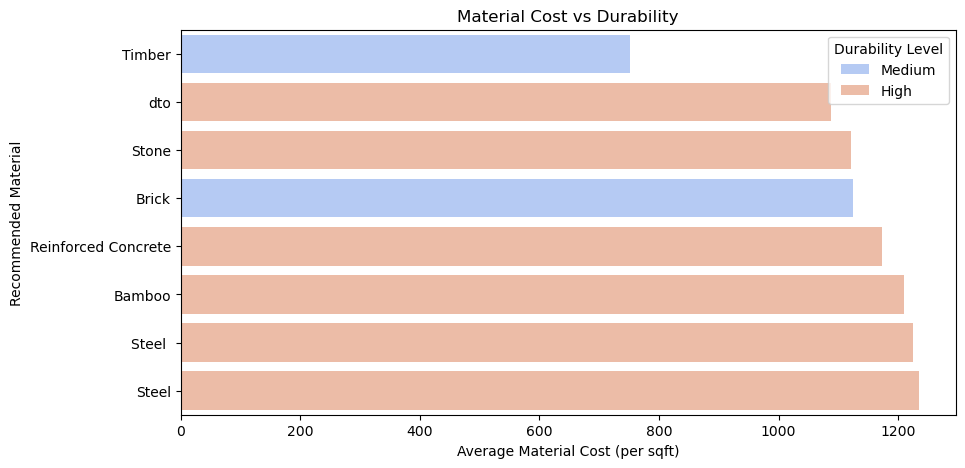

  Recommended Material     Avg_Cost Durability
6               Timber   752.055556     Medium
7                  dto  1087.000000       High
5                Stone  1121.163934       High
1                Brick  1124.111111     Medium
2  Reinforced Concrete  1172.982759       High
0               Bamboo  1209.066667       High
4               Steel   1225.000000       High
3                Steel  1234.321429       High


In [1451]:
# Plot cost vs durability
plt.figure(figsize=(10, 5))
sns.barplot(x="Avg_Cost", y="Recommended Material", hue="Durability", data=cost_durability_data, palette="coolwarm")

plt.xlabel("Average Material Cost (per sqft)")
plt.ylabel("Recommended Material")
plt.title("Material Cost vs Durability")
plt.legend(title="Durability Level")
plt.show()

# Display the cost and durability comparison
print(cost_durability_data)

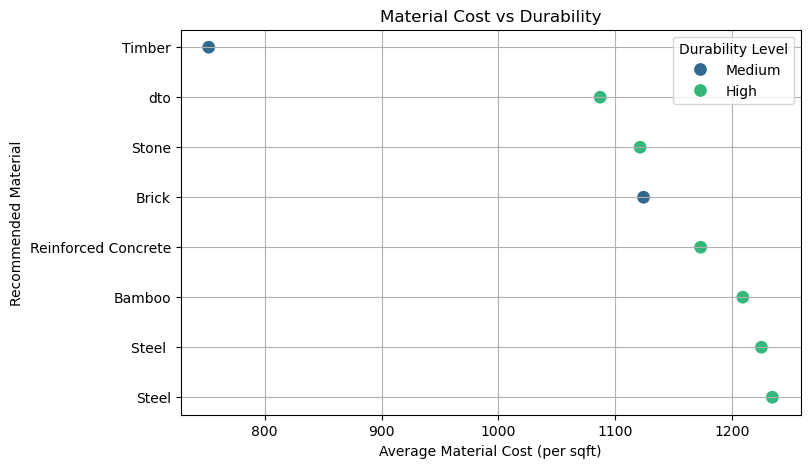

In [1452]:
#Cost vs. Material Durability
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Avg_Cost", y="Recommended Material", hue="Durability", data=cost_durability_data, palette="viridis", s=100)
plt.xlabel("Average Material Cost (per sqft)")
plt.ylabel("Recommended Material")
plt.title("Material Cost vs Durability")
plt.legend(title="Durability Level")
plt.grid(True)
plt.show()


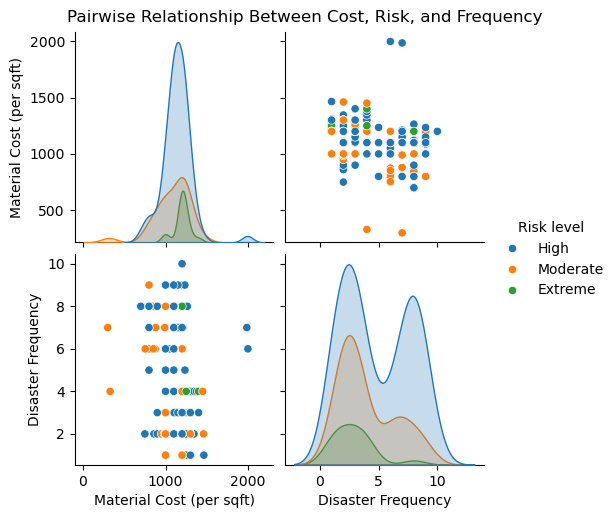

In [1453]:
sns.pairplot(data, hue="Risk level", vars=["Material Cost (per sqft)", "Disaster Frequency"])
plt.suptitle("Pairwise Relationship Between Cost, Risk, and Frequency", y=1.02)
plt.show()

### Encode Categorical Variables

In [1455]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
categorical_columns = ['Disaster Type','Risk level',
       'Disaster Location', 'Climate Zone',
       'Recommended Material', 'Material Durability', 'Soil Type', 'Structural Features',
       'Foundation Type']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])
print("\nEncoded Categorical Variables:")
print(data.head())


Encoded Categorical Variables:
  Disaster Date  Disaster Type  Disaster Frequency  Risk level  \
0    2000-04-01              0                 1.0           1   
1    2000-07-12              2                 6.0           1   
2    2000-08-15              2                 4.0           1   
3    2000-12-04              1                 3.0           1   
4    2000-01-26              1                 2.0           1   

   Disaster Location  Temperature (C)  Precipitation (mm)  Wind Speed (km/h)  \
0                 18             25.0               150.0              120.0   
1                  2             28.0               500.0               15.0   
2                  9             24.0               300.0               15.0   
3                 17             10.0                70.0               10.0   
4                  4             20.0                40.0               10.0   

   Humidity (%)  Climate Zone  Recommended Material  Material Cost (per sqft)  \
0        

### Normalize Numerical Columns

In [1457]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize numerical columns 
numerical_columns = ['Disaster Frequency', 'Temperature (C)', 'Precipitation (mm)',
       'Wind Speed (km/h)', 'Humidity (%)', 'Material Cost (per sqft)', 'Income Level (annual)']

# Apply scaling
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print("\nNormalized Numerical Columns:")
print(data.head())


Normalized Numerical Columns:
  Disaster Date  Disaster Type  Disaster Frequency  Risk level  \
0    2000-04-01              0            0.000000           1   
1    2000-07-12              2            0.555556           1   
2    2000-08-15              2            0.333333           1   
3    2000-12-04              1            0.222222           1   
4    2000-01-26              1            0.111111           1   

   Disaster Location  Temperature (C)  Precipitation (mm)  Wind Speed (km/h)  \
0                 18         0.647059            0.218936           0.547619   
1                  2         0.735294            0.764979           0.047619   
2                  9         0.617647            0.452955           0.047619   
3                 17         0.205882            0.094127           0.023810   
4                  4         0.500000            0.047323           0.023810   

   Humidity (%)  Climate Zone  Recommended Material  Material Cost (per sqft)  \
0        0

# Material Recommendation System

In [1459]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [1460]:
# 3.1 Prepare features and target variable
X = data.drop(columns=['Recommended Material','Disaster Date'])
y = data['Recommended Material']

In [1461]:
print(X)

     Disaster Type  Disaster Frequency  Risk level  Disaster Location  \
0                0            0.000000           1                 18   
1                2            0.555556           1                  2   
2                2            0.333333           1                  9   
3                1            0.222222           1                 17   
4                1            0.111111           1                  4   
..             ...                 ...         ...                ...   
205              4            0.000000           2                  6   
206              2            0.777778           1                  9   
207              1            0.222222           1                  6   
208              3            0.777778           1                 13   
209              0            0.000000           1                  4   

     Temperature (C)  Precipitation (mm)  Wind Speed (km/h)  Humidity (%)  \
0           0.647059            0.218936      

In [1462]:
print(y)

0      0
1      5
2      1
3      5
4      5
      ..
205    1
206    2
207    2
208    6
209    2
Name: Recommended Material, Length: 210, dtype: int32


In [1463]:
# 3.2 Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1464]:
# 3.3 Train a RandomForest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [1465]:
# 3.4 Predict and evaluate
y_pred = model.predict(X_test)
print(y_pred)

[0 2 5 2 6 1 6 3 5 1 3 5 5 5 2 2 5 6 2 5 5 5 1 5 6 3 2 1 1 3 6 5 5 0 1 0 2
 1 5 3 2 1]


In [1466]:
# Convert y_test_class to a NumPy array before reshaping
print(np.concatenate((y_pred.reshape(len(y_pred), 1), 
                      y_test.to_numpy().reshape(len(y_test), 1)), axis=1))

[[0 0]
 [2 2]
 [5 5]
 [2 3]
 [6 6]
 [1 5]
 [6 6]
 [3 2]
 [5 5]
 [1 1]
 [3 3]
 [5 5]
 [5 2]
 [5 5]
 [2 2]
 [2 2]
 [5 2]
 [6 6]
 [2 2]
 [5 5]
 [5 5]
 [5 5]
 [1 1]
 [5 5]
 [6 6]
 [3 3]
 [2 2]
 [1 1]
 [1 1]
 [3 3]
 [6 6]
 [5 7]
 [5 5]
 [0 0]
 [1 1]
 [0 3]
 [2 2]
 [1 1]
 [5 5]
 [3 3]
 [2 2]
 [1 5]]


In [1467]:
# Evaluate the model'
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy:.2f}")

Classification Accuracy: 0.81


# Risk Prediction

In [1469]:
# 4.1 Prepare features and target variable for risk prediction
X_risk = data[['Temperature (C)', 'Precipitation (mm)', 'Wind Speed (km/h)', 'Humidity (%)']]
y_risk = data['Risk level']


In [1470]:
# 4.2 Split data into train and test sets
X_train_risk, X_test_risk, y_train_risk, y_test_risk = train_test_split(X_risk, y_risk, test_size=0.2, random_state=42)


In [1471]:
# 4.3 Train a classifier to predict the risk level
risk_model = RandomForestClassifier(n_estimators=100, random_state=42)
risk_model.fit(X_train_risk, y_train_risk)

RandomForestClassifier(random_state=42)

In [1472]:
# 4.4 Predict and evaluate
y_pred_risk = risk_model.predict(X_test_risk)
print(y_pred_risk)


[1 2 1 2 2 2 2 0 1 2 1 2 1 2 1 1 2 2 1 1 1 1 2 1 2 0 1 2 1 0 1 1 1 1 2 1 2
 2 1 0 1 1]


In [1473]:
# Convert y_test_class to a NumPy array before reshaping
print(np.concatenate((y_pred_risk.reshape(len(y_pred_risk), 1), 
                      y_test_risk.to_numpy().reshape(len(y_test_risk), 1)), axis=1))

[[1 1]
 [2 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [0 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 0]
 [1 2]
 [1 1]
 [2 2]
 [2 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [2 1]
 [1 2]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 0]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [1 2]]


In [1474]:
# Evaluate the model'
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy:.2f}")

Classification Accuracy: 0.81


# Cost Optimization

In [1476]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [1477]:
# Prepare the feature set for cost prediction
X_cost = data[['Temperature (C)', 'Precipitation (mm)', 'Wind Speed (km/h)', 'Humidity (%)', 'Climate Zone', 'Disaster Type', 'Risk level']]
y_cost = data['Material Cost (per sqft)']

In [1478]:
# Split data into train and test sets
X_train_cost, X_test_cost, y_train_cost, y_test_cost = train_test_split(X_cost, y_cost, test_size=0.2, random_state=42)


In [1479]:
print(X_train_cost.isnull().sum())  # Check for NaN values in each column
print(y_train_cost.isnull().sum())  # Check for NaN values in the target variable


Temperature (C)       0
Precipitation (mm)    0
Wind Speed (km/h)     0
Humidity (%)          0
Climate Zone          0
Disaster Type         0
Risk level            0
dtype: int64
0


In [1480]:
# Train a Linear Regression model to predict material cost
cost_model = LinearRegression()
cost_model.fit(X_train_cost, y_train_cost)


LinearRegression()

In [1481]:
#Predict material costs
y_pred_cost = cost_model.predict(X_test_cost)
print(y_pred_cost)

[0.55202924 0.48207454 0.48337276 0.51785414 0.29194166 0.51681024
 0.33595155 0.56707658 0.50445152 0.45525877 0.57548005 0.47313095
 0.46653144 0.48106514 0.51340446 0.51614766 0.54136839 0.29425847
 0.4874201  0.46967535 0.53935371 0.4552793  0.51249976 0.49873413
 0.30768888 0.56311084 0.54819116 0.4558628  0.47232338 0.57217794
 0.31523588 0.49451516 0.47900182 0.54481593 0.4737175  0.53442693
 0.55602754 0.45853082 0.49397703 0.61277582 0.47475536 0.53391984]


In [1482]:
# Convert y_test_class to a NumPy array before reshaping
print(np.concatenate((y_pred_cost.reshape(len(y_pred_cost), 1), 
                      y_test_cost.to_numpy().reshape(len(y_test_cost), 1)), axis=1))

[[0.55202924 0.53034767]
 [0.48207454 0.58927519]
 [0.48337276 0.5368297 ]
 [0.51785414 0.53034767]
 [0.29194166 0.34177961]
 [0.51681024 0.41249263]
 [0.33595155 0.2946376 ]
 [0.56707658 0.58927519]
 [0.50445152 0.5509723 ]
 [0.45525877 0.41249263]
 [0.57548005 0.53034767]
 [0.47313095 0.41249263]
 [0.46653144 0.58927519]
 [0.48106514 0.41249263]
 [0.51340446 0.47142015]
 [0.51614766 0.47790218]
 [0.54136839 0.58927519]
 [0.29425847 0.23571008]
 [0.4874201  0.47142015]
 [0.46967535 0.47142015]
 [0.53935371 0.48497348]
 [0.4552793  0.47142015]
 [0.51249976 0.41249263]
 [0.49873413 0.41249263]
 [0.30768888 0.32115498]
 [0.56311084 0.53034767]
 [0.54819116 0.64820271]
 [0.4558628  0.53034767]
 [0.47232338 0.53034767]
 [0.57217794 0.53034767]
 [0.31523588 0.23571008]
 [0.49451516 0.46375958]
 [0.47900182 0.41249263]
 [0.54481593 0.61579258]
 [0.4737175  0.53034767]
 [0.53442693 0.53034767]
 [0.55602754 0.53034767]
 [0.45853082 0.53034767]
 [0.49397703 0.47142015]
 [0.61277582 0.53034767]


In [1483]:
# Evaluate the model
mse = mean_squared_error(y_test_cost, y_pred_cost)
print(f"Mean Squared Error for Material Cost Prediction: {mse}")

Mean Squared Error for Material Cost Prediction: 0.003800799199667835


In [1484]:
# 5.1 Analyze material cost across regions
material_cost_region = data.groupby('Disaster Location')['Material Cost (per sqft)'].mean().reset_index()


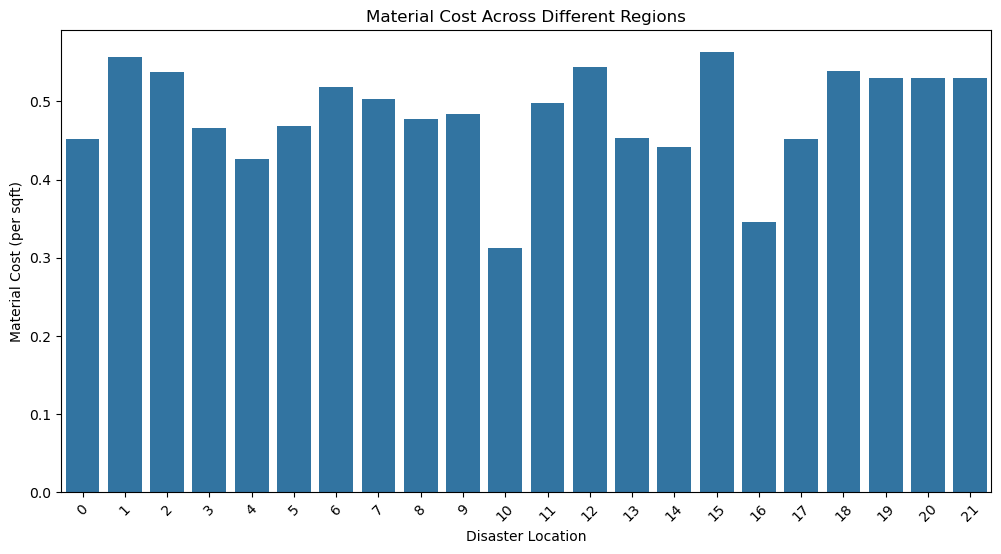

In [1485]:
# 5.2 Visualize cost distribution across regions
plt.figure(figsize=(12, 6))
sns.barplot(data=material_cost_region, x='Disaster Location', y='Material Cost (per sqft)')
plt.title('Material Cost Across Different Regions')
plt.xticks(rotation=45)
plt.show()

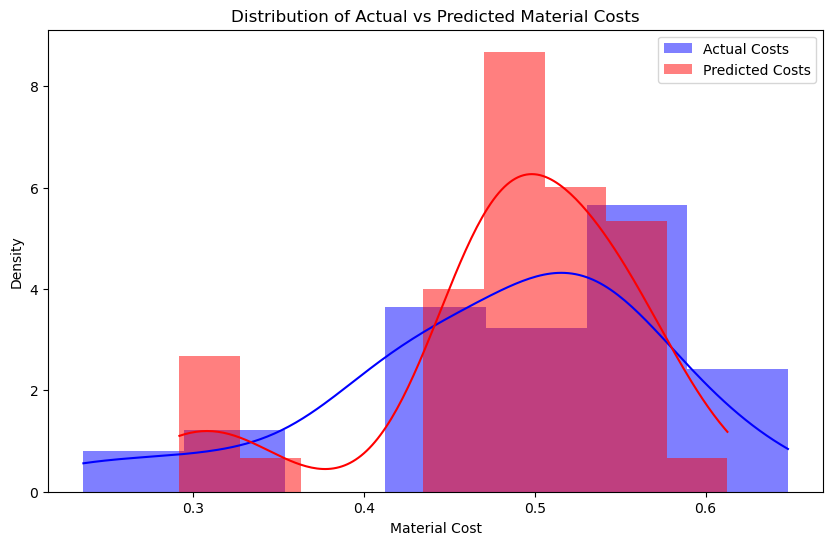

In [1486]:
# Distribution of actual vs predicted material costs
plt.figure(figsize=(10, 6))
sns.histplot(y_test_cost, color='blue', label='Actual Costs', kde=True, stat='density', linewidth=0)
sns.histplot(y_pred_cost, color='red', label='Predicted Costs', kde=True, stat='density', linewidth=0)
plt.title('Distribution of Actual vs Predicted Material Costs')
plt.xlabel('Material Cost')
plt.ylabel('Density')
plt.legend()
plt.show()


In [1487]:
region = 17
disaster_type = 2  

# Check the unique values of disaster location and type in the dataset
print("Unique Disaster Locations:", data['Disaster Location'].unique())
print("Unique Disaster Types:", data['Disaster Type'].unique())

# Filter the data for this region and disaster type
region_data = data[(data['Disaster Location'] == region) & (data['Disaster Type'] == disaster_type)]

# If no data is found for the region and disaster type, handle the case
if region_data.empty:
    print(f"No data found for Region {region} and Disaster Type {disaster_type}.")
else:
    # Prepare the feature set for the region data
    X_region_data = region_data[['Temperature (C)', 'Precipitation (mm)', 'Wind Speed (km/h)', 'Humidity (%)', 'Climate Zone', 'Disaster Type', 'Risk level']]

    # Convert categorical columns to numerical (encoding)
    X_region_data_encoded = pd.get_dummies(X_region_data, drop_first=True)

    # Predict the material cost for the region
    predicted_cost = cost_model.predict(X_region_data_encoded)
    print(f"Predicted Material Cost for Region {region} with Disaster Type {disaster_type}: {predicted_cost.mean()}")


Unique Disaster Locations: [18  2  9 17  4  5 15  3 16  8 12 10  1  6 11  0 13  7 14 19 20 21]
Unique Disaster Types: [0 2 1 4 3 5]
Predicted Material Cost for Region 17 with Disaster Type 2: 0.4857549397312775
